In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [5]:
df1 = pd.read_csv("data.csv")
df1.head()


,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1


In [6]:
df1.shape

(8129, 26)

In [7]:
df1.groupby('location')['location'].agg('count')

location
Abou El Kacem Chebbi      4
Aghir                    12
Ain Zaghouan Nord       144
Ain Zaghouan Sud         24
Ajim                      2
                       ... 
Zaouit Mornag             1
Zarzis                    5
Zarzouna                  5
Zone Touristique         26
Zone touristique          3
Name: location, Length: 468, dtype: int64

In [8]:
df2 = df1.drop(['pool','elevator','furnished','governorate', 'price_tnd', 'city', 'latt', 'long', 'concierge', 'garden', 'pieces', 'id', 'elevator','air_conditioning', 'equipped_kitchen', 'furnished'], axis='columns')
df2.head()

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,NaN,Cité El Bassatine Ancien,NaN,8.0,NaN,NaN,NaN,30.815266,0,0,0,0
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1
2,620000.0,Sousse Corniche,932.0,24.0,10.0,NaN,1.0,118.317747,0,0,0,1
3,620000.0,Sousse Corniche,932.0,24.0,NaN,NaN,NaN,118.316886,0,0,0,1
4,620000.0,Sousse Corniche,932.0,24.0,10.0,NaN,1.0,118.316886,0,0,0,1


In [9]:
df2.isnull().sum()

price_eur              1708
location                  0
Area                    185
room                    409
bathroom                659
age                    4145
state                  1100
distance_to_capital      35
garage                    0
beach_view                0
mountain_view             0
central_heating           0
dtype: int64

In [10]:
df3 = df2.dropna()
df3 = df3.rename(columns={
    'Area': 'area',
    'room': 'rooms',
    'bathroom': 'bathrooms',
})
df3.isnull().sum()

price_eur              0
location               0
area                   0
rooms                  0
bathrooms              0
age                    0
state                  0
distance_to_capital    0
garage                 0
beach_view             0
mountain_view          0
central_heating        0
dtype: int64

In [11]:
df3.shape

(2972, 12)

In [12]:
df3.head()

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1
5,310000.0,Sousse Riadh,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1
16,294500.0,El Gourjani,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0


In [13]:
df3.area.unique()

array([ 1000.,   462.,   510.,   538.,   400.,   220.,   800.,   750.,
         600.,   630.,   460.,   700.,   500.,   420.,   350.,   300.,
        2000.,  1900.,  1187.,   980.,   760.,   550.,   515.,   385.,
         120.,  6800.,  4000.,   900.,   865.,   780.,   761.,   652.,
         480.,   446.,   360.,   266.,   265.,   262.,   222.,   150.,
        1200.,   680.,   463.,   444.,   416.,   410.,   320.,   200.,
         161., 10000.,  6000.,  2700.,  1370.,  1300.,  1021.,   966.,
         960.,   790.,   650.,   504.,   454.,   451.,   380.,   318.,
         295.,   270.,   240.,   206.,   178.,   124., 12000.,  1330.,
        1104.,   670.,   667.,   660.,   613.,   578.,   495.,   485.,
         483.,   470.,   458.,   440.,   412.,   330.,   280.,   164.,
         143., 18000.,  2058.,  1350.,  1311.,  1180.,  1152.,  1120.,
        1080.,  1040.,   886.,   858.,   840.,   833.,   806.,   801.,
         730.,   705.,   675.,   628.,   577.,   570.,   540.,   453.,
      

In [14]:
df5 = df3.copy()
df5['price_per_m2'] = df5['price_eur'] / df5['area']
df5.head()

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
5,310000.0,Sousse Riadh,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0,310.000000
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1,1341.991342
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1,729.411765
16,294500.0,El Gourjani,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0,547.397770


In [15]:
len(df5.location.unique())

316

In [16]:
rare_location_threshold = 10  # will be exported to model_metadata.json
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Hammamet          138
Hammamet Nord     115
La Soukra         113
Cité Ennasr 2     113
Djerba            103
                 ... 
Sakiet Eddaier      1
Sakiet Ezzit        1
Salambo             1
Sbeïtla             1
Ajim                1
Name: location, Length: 316, dtype: int64

In [17]:
rare_locations = location_stats[location_stats<=rare_location_threshold]

In [18]:
df5.location = df5.location.apply(lambda x: 'other' if x in rare_locations else x)

In [19]:
len(df5.location.unique())


60

In [20]:
df5.head(10)

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
5,310000.0,other,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0,310.000000
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1,1341.991342
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1,729.411765
16,294500.0,other,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0,547.397770
18,201500.0,Raoued,400.0,9.0,4.0,1-5,2.0,17.242821,1,0,0,1,503.750000
19,34100.0,other,220.0,9.0,4.0,5-10,1.0,341.757988,0,0,0,0,155.000000
20,682000.0,Hammamet,1000.0,6.0,6.0,1-5,1.0,65.459722,1,0,0,1,682.000000
21,604500.0,Riadh al Andalous,800.0,10.0,8.0,0,2.0,6.324988,0,0,1,1,755.625000
22,263500.0,other,750.0,8.0,4.0,1-5,1.0,61.264218,1,1,1,0,351.333333


In [21]:
avg_room_size = 29.33 #medium sized room on https://safacts.co.za/average-size-of-a-bedroom-in-south-africa/

df5[df5.area/df5.rooms<avg_room_size].head()
df5.shape

(2972, 13)

In [22]:
df6 = df5[~(df5.area/df5.rooms<avg_room_size)]
df6.shape

(2906, 13)

In [23]:
df6.price_per_m2.describe()

count     2906.000000
mean       802.151161
std        855.389667
min          1.085000
25%        516.666667
50%        740.722403
75%        977.329159
max      38750.000000
Name: price_per_m2, dtype: float64

In [24]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_m2)
        st = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2>(m-st)) & (subdf.price_per_m2<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outlier(df6)
df7.shape

(2222, 13)

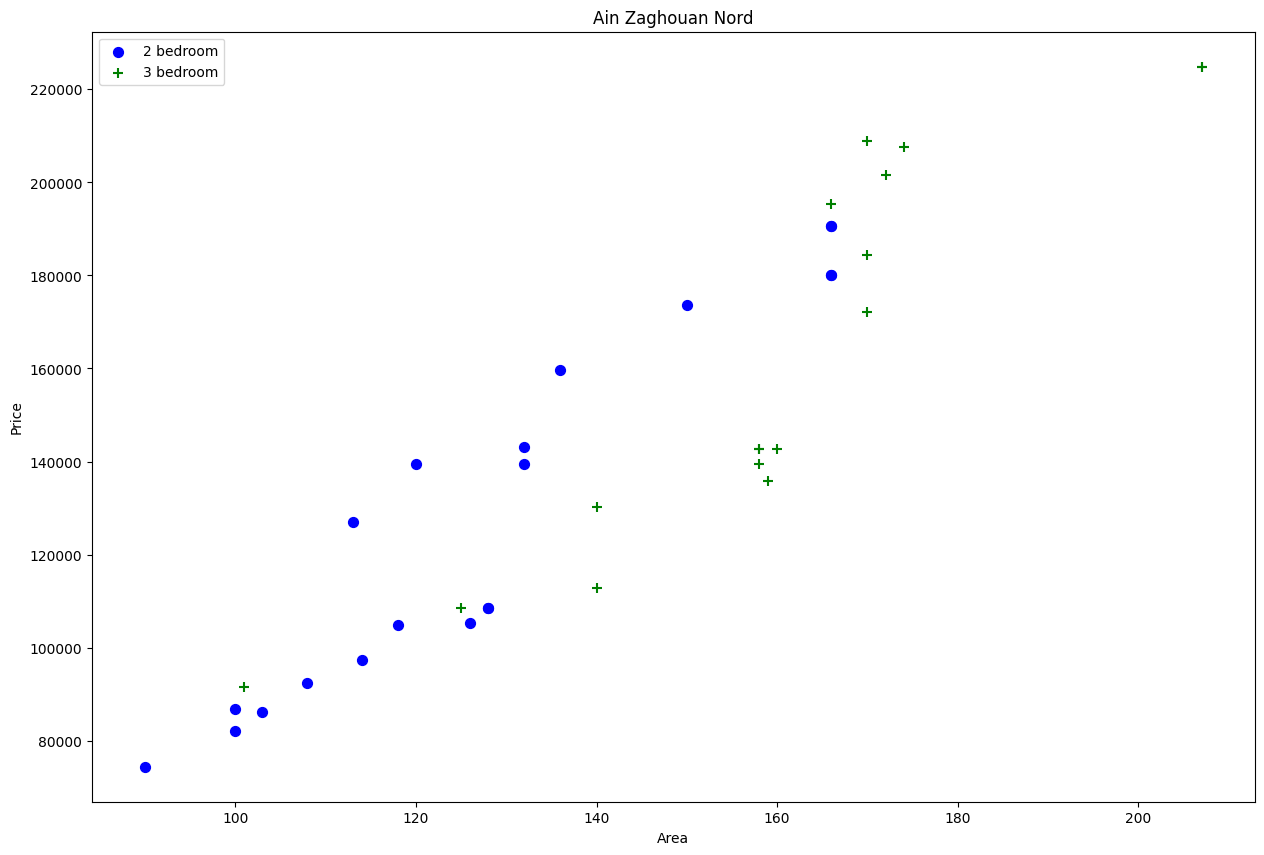

In [25]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.rooms==2)]
    bhk3 = df[(df.location==location) & (df.rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price_eur,color='blue',label='2 bedroom', s=50)
    plt.scatter(bhk3.area,bhk3.price_eur,marker='+',color='green',label='3 bedroom', s=50)
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Ain Zaghouan Nord")

In [26]:
df7.head(20).sort_values(by = 'location')

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,1-5,1.0,17.722190,0,0,0,0,897.368421
17,190650.00,Ain Zaghouan Nord,166.0,2.0,1.0,0,2.0,17.722190,0,0,0,1,1148.493976
16,184450.00,Ain Zaghouan Nord,170.0,3.0,1.0,0,2.0,17.722190,0,0,0,1,1085.000000
15,108500.00,Ain Zaghouan Nord,125.0,3.0,2.0,1-5,1.0,17.722190,0,0,0,0,868.000000
14,130200.00,Ain Zaghouan Nord,140.0,3.0,2.0,1-5,1.0,2.191132,1,0,0,0,930.000000
13,139500.00,Ain Zaghouan Nord,158.0,3.0,2.0,5-10,2.0,12.885850,1,0,0,1,882.911392
12,142600.00,Ain Zaghouan Nord,158.0,3.0,2.0,0,2.0,17.722190,1,0,0,1,902.531646
11,142600.00,Ain Zaghouan Nord,158.0,3.0,2.0,0,2.0,17.722190,1,0,0,0,902.531646
10,142600.00,Ain Zaghouan Nord,160.0,3.0,3.0,1-5,2.0,12.885850,1,0,0,1,891.250000
9,195300.00,Ain Zaghouan Nord,166.0,3.0,2.0,0,2.0,17.722190,0,0,0,1,1176.506024


In [27]:
def remove_room_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        room_stats = {}
        for room, room_df in location_df.groupby('rooms'):
            room_stats[room] = {
                'mean': np.mean(room_df.price_per_m2),
                'std': np.std(room_df.price_per_m2),
                'count': room_df.shape[0]
            }
        for room, room_df in location_df.groupby('rooms'):
            stats = room_stats.get(room-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, room_df[room_df.price_per_m2<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_room_outlier(df7)
df8.shape

(1478, 13)

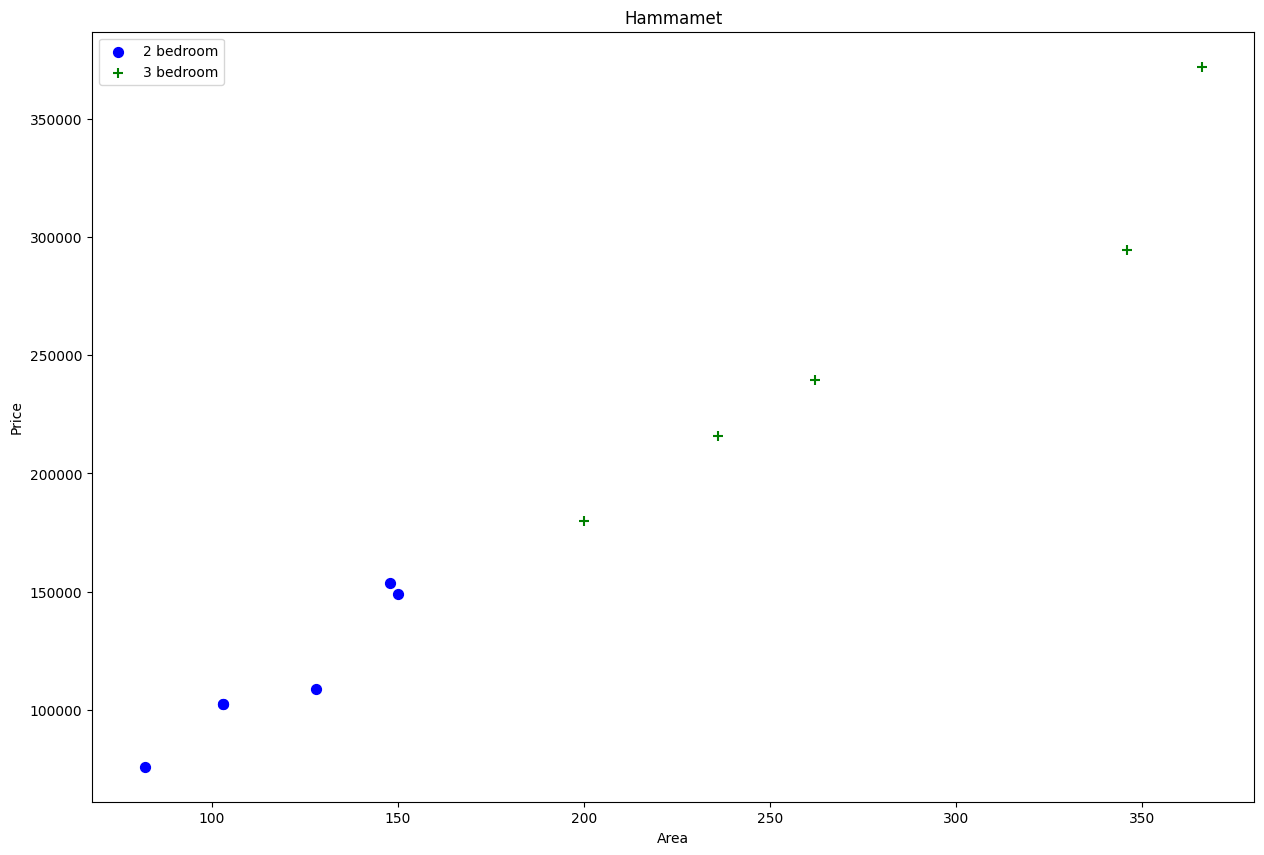

In [28]:
plot_scatter_chart(df8,"Hammamet")

Text(0, 0.5, 'Count')

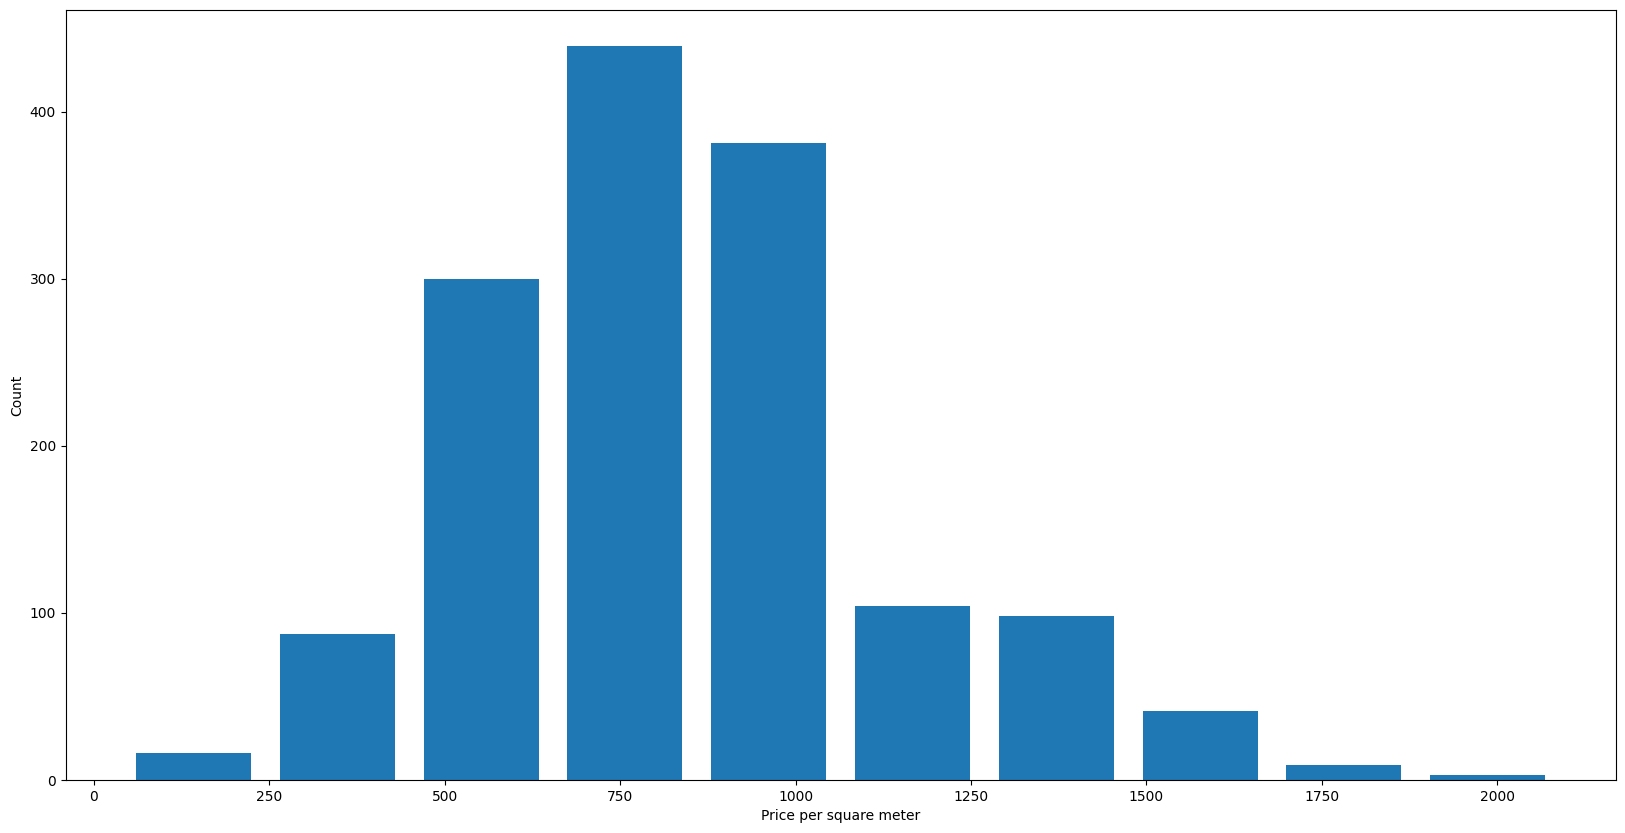

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_m2,rwidth=0.8)
plt.xlabel("Price per square meter")
plt.ylabel("Count")


In [30]:
df8.bathrooms.unique()

array([ 4.,  2.,  3.,  1.,  5., 14.,  6.,  8.,  9., 12.,  7.])

In [31]:
df8[df8.bathrooms>10]

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
561,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
1619,434000.0,other,420.0,12.0,12.0,0,2.0,173.267711,0,0,0,1,1033.333333


Text(0, 0.5, 'Count')

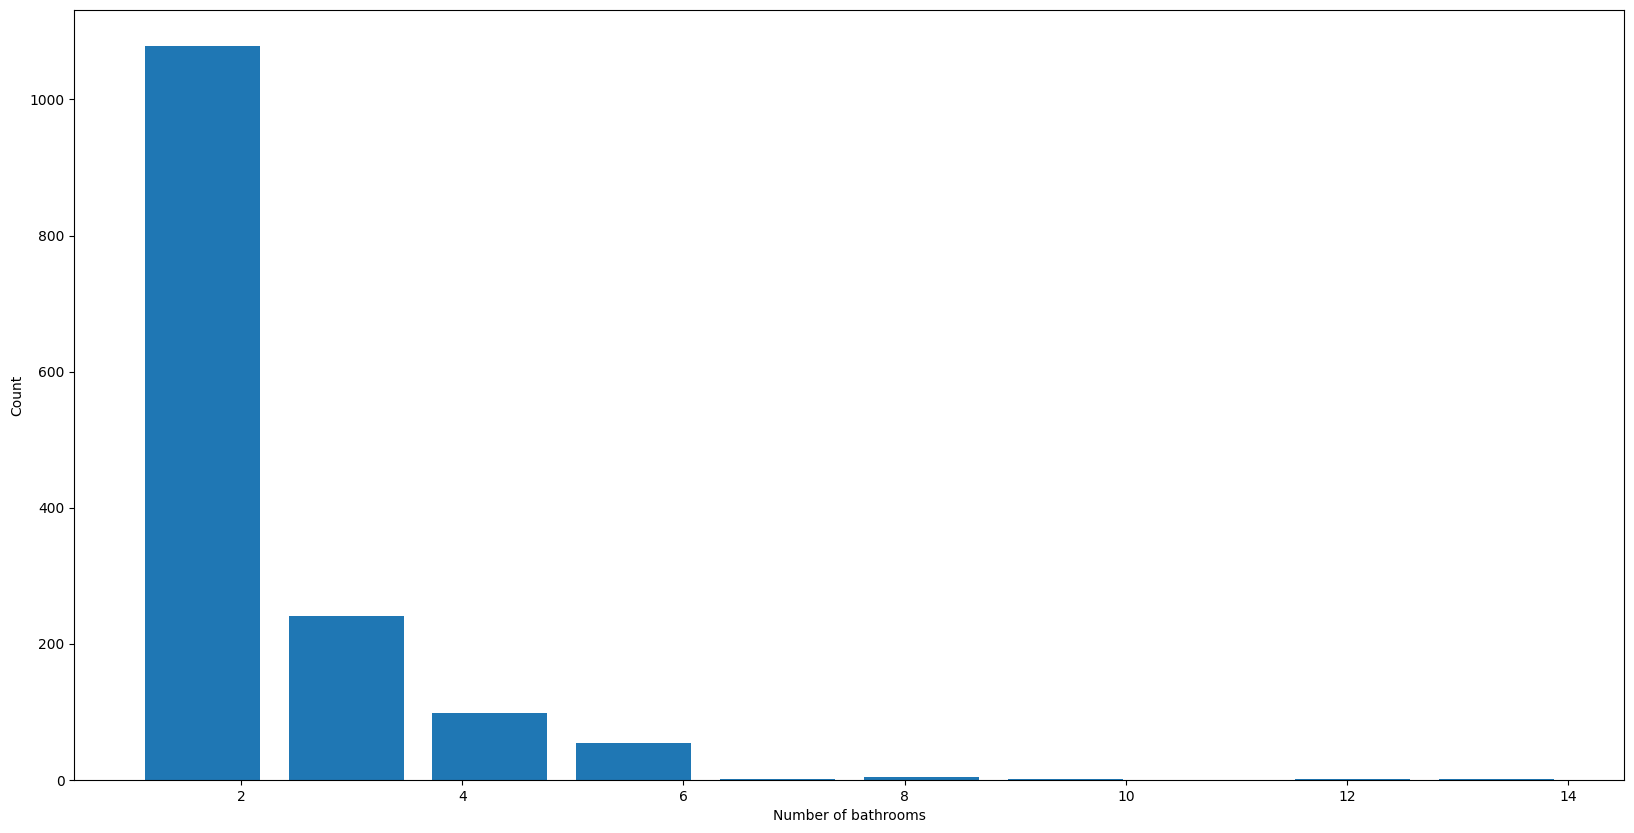

In [32]:
plt.hist(df8.bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [33]:
df9 = df8[df8.bathrooms<df8.rooms+2]
df9.shape

(1474, 13)

In [34]:
df9.head(20).sort_values(by = 'location')

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,1-5,1.0,17.722190,0,0,0,0,897.368421
30,127100.00,Ain Zaghouan Nord,113.0,2.0,2.0,0,2.0,17.722190,1,0,0,1,1124.778761
28,139500.00,Ain Zaghouan Nord,120.0,2.0,2.0,0,2.0,13.621007,1,0,0,1,1162.500000
24,139500.00,Ain Zaghouan Nord,132.0,2.0,2.0,0,2.0,17.722190,0,0,0,1,1056.818182
23,159650.00,Ain Zaghouan Nord,136.0,2.0,2.0,0,2.0,12.885850,0,0,0,0,1173.897059
21,173600.00,Ain Zaghouan Nord,150.0,2.0,2.0,0,2.0,10.201342,0,0,0,1,1157.333333
19,180110.00,Ain Zaghouan Nord,166.0,2.0,2.0,1-5,2.0,12.885850,0,0,0,0,1085.000000
18,190650.00,Ain Zaghouan Nord,166.0,2.0,2.0,0,2.0,17.722190,1,0,0,0,1148.493976
17,190650.00,Ain Zaghouan Nord,166.0,2.0,1.0,0,2.0,17.722190,0,0,0,1,1148.493976
16,184450.00,Ain Zaghouan Nord,170.0,3.0,1.0,0,2.0,17.722190,0,0,0,1,1085.000000


In [35]:
df10 = df9.drop(['price_per_m2',], axis='columns')
df10.head(3)

,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,1-5,1.0,17.72219,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,2.0,0,2.0,17.72219,0,0,0,1
3,224866.25,Ain Zaghouan Nord,207.0,3.0,3.0,0,2.0,17.72219,1,0,0,1


In [36]:
def convert_age_to_avg(a):
    tokens = a.split('-') 
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(a)
    except:
        return None

In [37]:
df11 = df10.copy()
df11['age'] = df11['age'].apply(convert_age_to_avg)
df11.dropna(subset=['age'], inplace=True)
df11.location = df11.location.apply(lambda x: x.strip())
df11.head(3)


,price_eur,location,area,rooms,bathrooms,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,3.0,1.0,17.72219,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,2.0,0.0,2.0,17.72219,0,0,0,1
3,224866.25,Ain Zaghouan Nord,207.0,3.0,3.0,0.0,2.0,17.72219,1,0,0,1


In [38]:
df11.age.unique()

array([ 3. ,  0. ,  7.5, 15. , 25. , 40. , 60. , 85. ])

In [39]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,Ain Zaghouan Nord,Ain Zaghouan Sud,Aouina,Ariana,Bhar Lazreg,Bizerte,Borj Cedria,Borj Louzir,Bou Mhel,Carthage,...,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(df11.corr(), annot=True, cmap='YlGnBu')
plt.savefig('heatmap.png')

ValueError: could not convert string to float: 'Ain Zaghouan Nord'

<Figure size 1500x800 with 0 Axes>

In [ ]:
df12 = pd.concat([df11,dummies],axis='columns')
df12.head(3)

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,3.0,1.0,17.72219,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,2.0,0.0,2.0,17.72219,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224866.25,Ain Zaghouan Nord,207.0,3.0,3.0,0.0,2.0,17.72219,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df13 = df12.drop('location',axis='columns')
df13.head(3)

,price_eur,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,682000.00,760.0,9.0,4.0,3.0,1.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180110.00,166.0,2.0,2.0,0.0,2.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224866.25,207.0,3.0,3.0,0.0,2.0,17.72219,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df13.shape

(1431, 70)

In [ ]:
x = df13.drop(['price_eur',	'state',	'distance_to_capital',	'garage',	'beach_view',	'mountain_view', 'central_heating'], axis='columns')
x.head(3)

,Area,room,bathroom,Ain Zaghouan Nord,Ain Zaghouan Sud,Aouina,Ariana,Bhar Lazreg,Bizerte,Borj Cedria,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,760.0,9.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,166.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,207.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df13.price_eur
y.head(3)

0    682000.00
2    180110.00
3    224866.25
Name: price_eur, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)


0.8440491510921343

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82164853, 0.93263144, 0.8290765 , 0.82515389, 0.70999846])

In [ ]:
df13.corr()

,price_eur,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
price_eur,1.000000,0.838490,0.499538,0.561435,0.212707,-0.146429,-0.125306,0.271820,0.040718,0.041439,...,-0.040793,0.256233,-0.030704,-0.059923,-0.016956,0.007056,-0.060412,0.025606,0.033265,0.048979
Area,0.838490,1.000000,0.582964,0.516673,0.261263,-0.183373,-0.042441,0.221168,-0.003725,0.074587,...,-0.019021,0.194781,-0.025807,-0.039829,0.001615,0.014906,-0.054547,-0.006242,0.005651,0.042848
room,0.499538,0.582964,1.000000,0.738636,0.324941,-0.203683,-0.026483,0.244595,-0.029789,0.059564,...,0.000504,0.166028,-0.026012,-0.032856,0.068706,0.079468,-0.063926,-0.007042,-0.029555,-0.002760
bathroom,0.561435,0.516673,0.738636,1.000000,0.118048,-0.046332,-0.023564,0.267546,0.009444,0.056343,...,-0.023950,0.106891,-0.037137,-0.051404,0.040834,0.066562,-0.032070,0.048990,-0.024832,0.034690
age,0.212707,0.261263,0.324941,0.118048,1.000000,-0.625738,-0.115715,0.026085,-0.081800,-0.011223,...,-0.044090,0.225901,-0.027454,0.010302,-0.034295,0.012391,-0.074145,-0.029931,0.006598,-0.031773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Riadh al Andalous,0.007056,0.014906,0.079468,0.066562,0.012391,-0.041177,-0.062890,-0.000981,-0.037411,0.081586,...,-0.008634,-0.011939,-0.015566,-0.011285,-0.010230,1.000000,-0.013442,-0.007717,-0.008188,-0.014273
Sahloul,-0.060412,-0.054547,-0.063926,-0.032070,-0.074145,0.104752,0.102905,-0.053639,-0.047473,-0.043009,...,-0.010956,-0.015150,-0.019753,-0.014321,-0.012982,-0.013442,1.000000,-0.009793,-0.010390,-0.018112
Sidi Daoued,0.025606,-0.006242,-0.007042,0.048990,-0.029931,0.032989,-0.035983,-0.005728,-0.027254,-0.024691,...,-0.006290,-0.008698,-0.011340,-0.008221,-0.007453,-0.007717,-0.009793,1.000000,-0.005965,-0.010398
Sidi El Mahrsi,0.033265,0.005651,-0.029555,-0.024832,0.006598,-0.037973,0.014109,-0.014943,0.026147,-0.026198,...,-0.006674,-0.009228,-0.012032,-0.008723,-0.007908,-0.008188,-0.010390,-0.005965,1.000000,-0.011032


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {   
                'fit_intercept' : [True, False],     
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.824316,{'fit_intercept': False}
1,lasso,0.823711,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.754794,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
x.columns

Index(['Area', 'room', 'bathroom', 'Ain Zaghouan Nord', 'Ain Zaghouan Sud',
       'Aouina', 'Ariana', 'Bhar Lazreg', 'Bizerte', 'Borj Cedria',
       'Borj Louzir', 'Bou Mhel', 'Carthage', 'Chotrana 1', 'Cité El Wafa',
       'Cité Ennasr 1', 'Cité Ennasr 2', 'Cité Ennkhilet', 'Cité el Ghazela',
       'Dar Châabane', 'Djerba', 'El Haouaria', 'El Kantaoui', 'El Manar 1',
       'El Menzah 5', 'El Menzah 9', 'El Mourouj 5', 'El Mourouj 6', 'Ezzahra',
       'Gabès', 'Gammarth', 'Gammarth Village', 'Hammam El Ghezaz',
       'Hammam Lif', 'Hammam Sousse', 'Hammamet', 'Hammamet Nord',
       'Hammamet Sud', 'Hergla', 'Houmt Souk', 'Kélibia', 'La Manouba',
       'La Marsa', 'La Soukra', 'Le Bardo', 'Le Kram', 'Les Berges Du Lac 1',
       'Les Berges Du Lac 2', 'Les Jardins d'El Menzah 1',
       'Les Jardins d'El Menzah 2', 'Les Jardins de Carthage', 'Midoune',
       'Mornag', 'Mutuelle Ville', 'Nabeul', 'Nouvelle Medina', 'Raoued',
       'Riadh al Andalous', 'Sahloul', 'Sidi Daoued',

In [ ]:
np.where(x.columns=='Cité Ennasr 1')[0][0]

15

In [ ]:
NUMERIC_FEATURES = ["area", "rooms", "bathrooms", "age"]

def _make_feature_vector(location: str, *, area: float, rooms: float, bathrooms: float, age: float) -> np.ndarray:
    x_vec = np.zeros(len(x.columns))
    values = {"area": area, "rooms": rooms, "bathrooms": bathrooms, "age": age}
    for feature_name in NUMERIC_FEATURES:
        matches = np.where(x.columns == feature_name)[0]
        if len(matches) != 1:
            raise ValueError(f"Expected exactly one column named '{feature_name}', found {len(matches)}")
        x_vec[matches[0]] = values[feature_name]

    loc_matches = np.where(x.columns == location)[0]
    if len(loc_matches) != 1:
        raise ValueError(f"Unknown or ambiguous location: {location!r}")
    x_vec[loc_matches[0]] = 1
    return x_vec

def predict_price(location: str, *, area: float, rooms: float, bathrooms: float, age: float) -> float:
    x_vec = _make_feature_vector(location, area=area, rooms=rooms, bathrooms=bathrooms, age=age)
    return float(lr_clf.predict([x_vec])[0])

In [ ]:
df13.head(3)

,price_eur,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,682000.00,760.0,9.0,4.0,3.0,1.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180110.00,166.0,2.0,2.0,0.0,2.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224866.25,207.0,3.0,3.0,0.0,2.0,17.72219,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predict_price('Cité Ennasr 1', area=100, rooms=2, bathrooms=1, age=10)

468222.0662508874

In [ ]:
predict_price('Les Berges Du Lac 2', area=200, rooms=3, bathrooms=2, age=5)

474305.8909419899

In [ ]:
from safetensors.numpy import save_file

# Extract model parameters for safetensors export
# Note: Ensure 'safetensors' is installed: pip install safetensors
tensors = {
    "coef": lr_clf.coef_,
    "intercept": np.array([lr_clf.intercept_])
}

save_file(tensors, "tunisia_home_prices_model.safetensors")

In [ ]:
import json
from datetime import datetime, timezone

schema_version = 1
top_n_locations = 20

numeric_features = ["area", "rooms", "bathrooms", "age"]

columns_payload = {
    "schema_version": schema_version,
    "numeric_features": numeric_features,
    "data_columns": [str(col) for col in x.columns],
}
with open("columns.json", "w", encoding="utf-8") as f:
    json.dump(columns_payload, f, ensure_ascii=False, indent=2)

top_locations = location_stats.head(top_n_locations)
bucketed = location_stats[location_stats <= rare_location_threshold]

metadata_payload = {
    "schema_version": schema_version,
    "trained_at_utc": datetime.now(timezone.utc).isoformat(),
    "top_n_locations": top_n_locations,
    "rare_location_threshold": int(rare_location_threshold),
    "numeric_features": numeric_features,
    "n_training_rows": int(df13.shape[0]),
    "n_features": int(len(x.columns)),
    "location_summary": {
        "top_locations": [
            {"location": str(loc), "count": int(cnt)} for loc, cnt in top_locations.items()
        ],
        "bucketed_locations_count": int(bucketed.shape[0]),
        "bucketed_total_rows_count": int(bucketed.sum()),
        "distinct_locations_pre_bucket": int(location_stats.shape[0]),
        "distinct_locations_post_bucket": int(df5.location.nunique()),
    },
}
with open("model_metadata.json", "w", encoding="utf-8") as f:
    json.dump(metadata_payload, f, ensure_ascii=False, indent=2)